In [1]:
from common import *
from experiment import *
from data import RawData, PlottableData

/users/ygina/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
TREATMENTS = [
    TCPTreatment(cca='cubic', pep=False),
    TCPTreatment(cca='cubic', pep=True),
    TCPTreatment(cca='bbr', pep=False),
    TCPTreatment(cca='bbr', pep=True),
    TCPTreatment(cca='bbrv2', pep=False),
    TCPTreatment(cca='bbrv2', pep=True),
]
TCP_CUBIC = TREATMENTS[0]
PEP_CUBIC = TREATMENTS[1]
TCP_BBR = TREATMENTS[2]
PEP_BBR = TREATMENTS[3]
TCP_BBRV2 = TREATMENTS[4]
PEP_BBRV2 = TREATMENTS[5]

In [3]:
NETWORKS = [
    NetworkSetting(),
]
DEFAULT_NETWORK = NETWORKS[0]

# Data size vs. throughput for fixed data sizes bar graph, with error bars

In [18]:
def plot_data_size_vs_metric_bar(data, delta, title, ylabel):
    pass

In [13]:
execute = False
num_trials = 50
treatments = [TCP_BBR, PEP_BBR]
network_settings = [DEFAULT_NETWORK]
data_sizes = [
    100,
    1000,
    10000,
    100000,
    1000000,
]
exp = Experiment(num_trials, treatments, network_settings, data_sizes)
raw_data = RawData(exp, execute=execute)

MISSING: sudo -E python3 emulation/main.py -t 50 --label tcp_cubic tcp -cca cubic -n 100
MISSING: sudo -E python3 emulation/main.py -t 50 --label tcp_cubic tcp -cca cubic -n 1000
MISSING: sudo -E python3 emulation/main.py -t 50 --label tcp_cubic tcp -cca cubic -n 10000
MISSING: sudo -E python3 emulation/main.py -t 50 --label tcp_cubic tcp -cca cubic -n 100000
MISSING: sudo -E python3 emulation/main.py -t 50 --label tcp_cubic tcp -cca cubic -n 1000000
MISSING: sudo -E python3 emulation/main.py -t 50 --label pep_cubic tcp --pep -cca cubic -n 100
MISSING: sudo -E python3 emulation/main.py -t 50 --label pep_cubic tcp --pep -cca cubic -n 1000
MISSING: sudo -E python3 emulation/main.py -t 50 --label pep_cubic tcp --pep -cca cubic -n 10000
MISSING: sudo -E python3 emulation/main.py -t 50 --label pep_cubic tcp --pep -cca cubic -n 100000
MISSING: sudo -E python3 emulation/main.py -t 50 --label pep_cubic tcp --pep -cca cubic -n 1000000


In [20]:
delta = 45
title = f'p{50-delta} to p{50+delta} Goodput'
metric = 'throughput_mbps'
ylabel = 'Goodput (Mbit/s)'
plottable_data = PlottableData(raw_data, metric=metric)
plot_data_size_vs_metric_bar(plottable_data, delta=delta, title=title, ylabel=ylabel)

# Data size vs. thoughput line graph, with error bars

In [4]:
def plot_data_size_vs_metric_line(data, delta, title, ylabel):
    plt.figure(figsize=(6, 4))
    
    labels = data.treatments
    assert len(data.network_settings) == 1
    network = data.network_settings[0]

    for label in labels:
        subdata = data.data[label][network]
        xs_raw = sorted(subdata.keys())
        ys_raw = [subdata[x] for x in xs_raw]

        xs = [x/1000 for x in xs_raw]
        ys = [y.p(50) for y in ys_raw]
        yerr_lower = [y.p(50) - y.p(50-delta) for y in ys_raw]
        yerr_upper = [y.p(50+delta) - y.p(50) for y in ys_raw]
        plt.errorbar(xs, ys, yerr=(yerr_lower, yerr_upper), marker='.', capsize=5, label=label)

    plt.title(title)
    plt.xlabel('Download Data Size (KB)')
    plt.ylabel(ylabel)
    plt.grid()
    plt.xlim(0)
    plt.ylim(0)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=4)
    plt.show()

In [5]:
execute = True
num_trials = 50
treatments = [TCP_BBR, PEP_BBR]
network_settings = [DEFAULT_NETWORK]
data_sizes = [
    100,
    1000,
    10000,
    100000,
    1000000,
    10000000,
]
exp = Experiment(num_trials, treatments, network_settings, data_sizes)
raw_data = RawData(exp, execute=False)

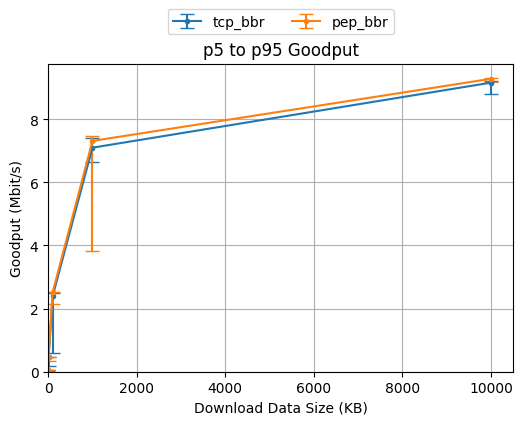

In [6]:
delta = 45
title = f'p{50-delta} to p{50+delta} Goodput'
metric = 'throughput_mbps'
ylabel = 'Goodput (Mbit/s)'
plottable_data = PlottableData(raw_data, metric=metric)
plot_data_size_vs_metric_line(plottable_data, delta=delta, title=title, ylabel=ylabel)

# Latency CDF for fixed data size